### Name: Meghann Sandhu
### Assignment 2.1

# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things.

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new.

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting options for better display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Placeholder for helper functions
def describe_data(df):
    """
    Prints basic statistics and information about the dataset.
    """
    print("Dataset Information:")
    print(df.info())
    print("\nSummary Statistics:")
    print(df.describe())

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [3]:
df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")

<ipython-input-3-3fba114b5bcf>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")


In [4]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [6]:
df_raw.dtypes

,0
Date,object
Time,object
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64


OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [8]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()

In [9]:
#create your Datetime column
# Combine 'Date' and 'Time' into a 'Datetime' column and convert to datetime type
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Display the first few rows to verify
print("First 5 rows after creating 'Datetime':")
print(df[['Datetime', 'Date', 'Time']].head())

First 5 rows after creating 'Datetime':
             Datetime        Date      Time
0 2006-12-16 17:24:00  16/12/2006  17:24:00
1 2006-12-16 17:25:00  16/12/2006  17:25:00
2 2006-12-16 17:26:00  16/12/2006  17:26:00
3 2006-12-16 17:27:00  16/12/2006  17:27:00
4 2006-12-16 17:28:00  16/12/2006  17:28:00


In [10]:
# Convert all data columns to numeric, handling errors by setting invalid parsing to NaN
data_columns = df.columns.difference(['Datetime'])  # Exclude 'Datetime' column
df[data_columns] = df[data_columns].apply(pd.to_numeric, errors='coerce')

# Display the first few rows to verify the conversion
print("First 5 rows after converting data columns to numeric:")
print(df.head())

# Check the data types to ensure conversion
print("\nData types after conversion:")
print(df.dtypes)

First 5 rows after converting data columns to numeric:
   Date  Time  Global_active_power  Global_reactive_power  Voltage  \
0   NaN   NaN                4.216                  0.418   234.84   
1   NaN   NaN                5.360                  0.436   233.63   
2   NaN   NaN                5.374                  0.498   233.29   
3   NaN   NaN                5.388                  0.502   233.74   
4   NaN   NaN                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0              18.4             0.0             1.0            17.0   
1              23.0             0.0             1.0            16.0   
2              23.0             0.0             2.0            17.0   
3              23.0             0.0             1.0            17.0   
4              15.8             0.0             1.0            17.0   

             Datetime  
0 2006-12-16 17:24:00  
1 2006-12-16 17:25:00  
2 2006-12-16 17:26:00  
3

Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [11]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [13]:
# Display the first few rows to verify the new columns
print("First 5 rows after splitting 'Datetime' into 'Date' and 'Time':")
print(df[['Datetime', 'Date', 'Time']].head())

# Check the data types of the new columns
print("\nData types after splitting 'Datetime':")
print(df[['Date', 'Time']].dtypes)

First 5 rows after splitting 'Datetime' into 'Date' and 'Time':
             Datetime        Date      Time
0 2006-12-16 17:24:00  2006-12-16  17:24:00
1 2006-12-16 17:25:00  2006-12-16  17:25:00
2 2006-12-16 17:26:00  2006-12-16  17:26:00
3 2006-12-16 17:27:00  2006-12-16  17:27:00
4 2006-12-16 17:28:00  2006-12-16  17:28:00

Data types after splitting 'Datetime':
Date    object
Time    object
dtype: object


In [12]:
df.dtypes

,0
Date,object
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64
Datetime,datetime64[ns]


It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [14]:
df.Date[0]

datetime.date(2006, 12, 16)

In [15]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [16]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


Those row counts look a little funky. Let's visualize our missing data.

<Axes: >

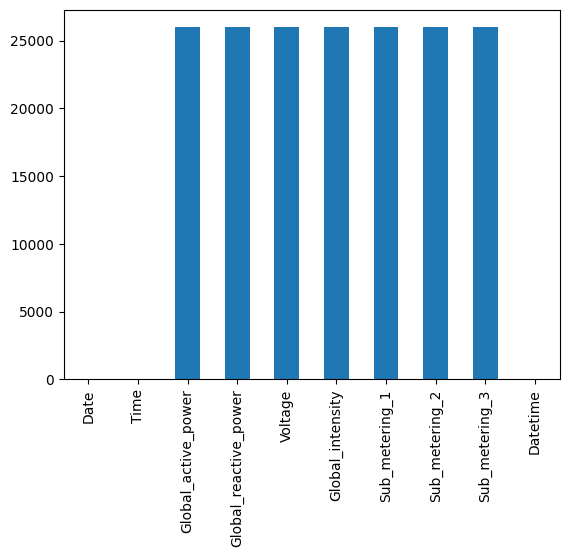

In [17]:
df.isna().sum().plot.bar()

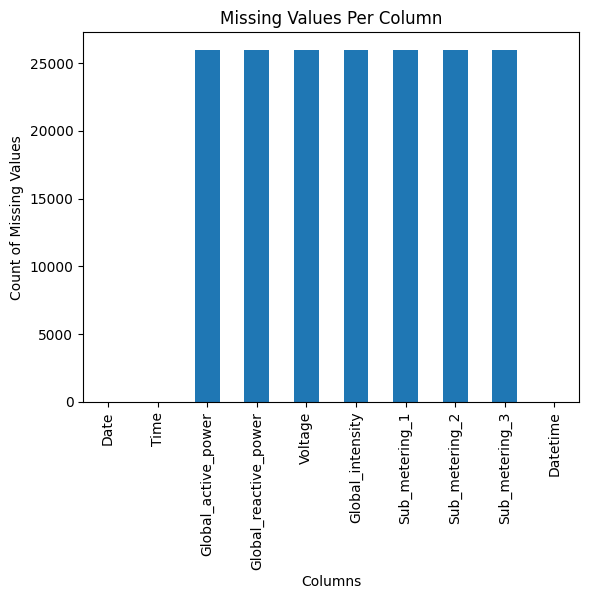

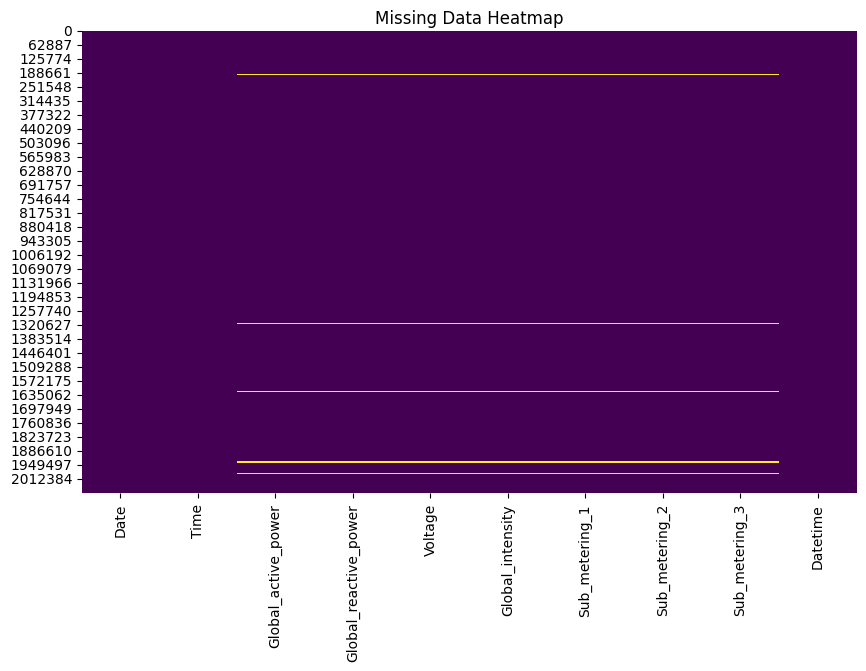

In [18]:
# Visualize missing data counts using a bar chart
df.isna().sum().plot.bar(title="Missing Values Per Column")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.show()

# Optional: Missing data heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

<Axes: xlabel='Date'>

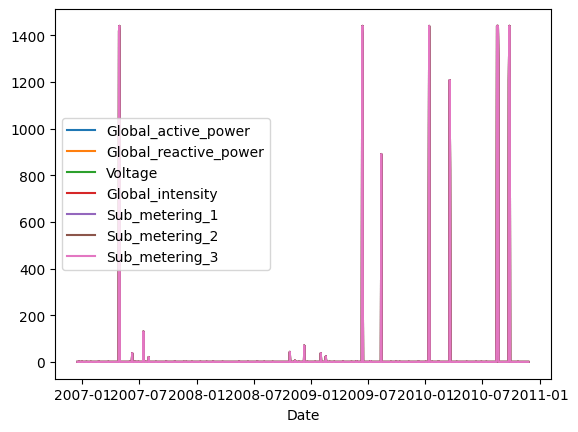

In [19]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot(x='Date', y=df_na.columns[2:-1])

The chart visualizes missing values grouped by the Date column. This plot provides insights into how missing values are distributed over time for different columns.

Observations:
Certain dates have a higher concentration of missing values for specific columns.
This can help identify patterns (e.g., system failures or missing data during specific time ranges).

**Q: What do you notice about the pattern of missing data?**

A:  The pattern of missing data appears sporadic, with certain dates having significantly higher missing values across multiple columns. This could be due to data collection errors or system failures during those periods.

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: Imputation using interpolation makes the most sense in this context because:

- The dataset is time-series-based, and neighboring data points are likely
correlated.
- Interpolation can provide reasonable estimates for missing values while preserving the overall trends and patterns in the data.
- Dropping rows would result in a loss of valuable information, especially given the size of the dataset.


**TODO:Use your preferred method to remove or impute a value for the missing data**

In [20]:
#clean up missing data here
# Use linear interpolation to fill missing values
df_interpolated = df.interpolate(method='linear', limit_direction='forward', axis=0)

# Verify that missing values are filled
print("Missing values after interpolation:")
print(df_interpolated.isna().sum())

<ipython-input-20-e56695c3ab13>:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate(method='linear', limit_direction='forward', axis=0)


Missing values after interpolation:
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64


In [21]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A:
1. **Global_active_power**: Represents the total power consumption and is a primary metric to analyze electricity usage patterns over time.
2. **Voltage**: Provides insights into fluctuations in the supply voltage, which may correlate with power usage trends or anomalies.
3. **Sub_metering_1**: Indicates energy usage for specific appliances in the household and can help identify seasonal or time-of-day trends.
4. **Sub_metering_2**: Offers a similar perspective as Sub_metering_1, and comparing them over time can reveal variations in appliance usage.


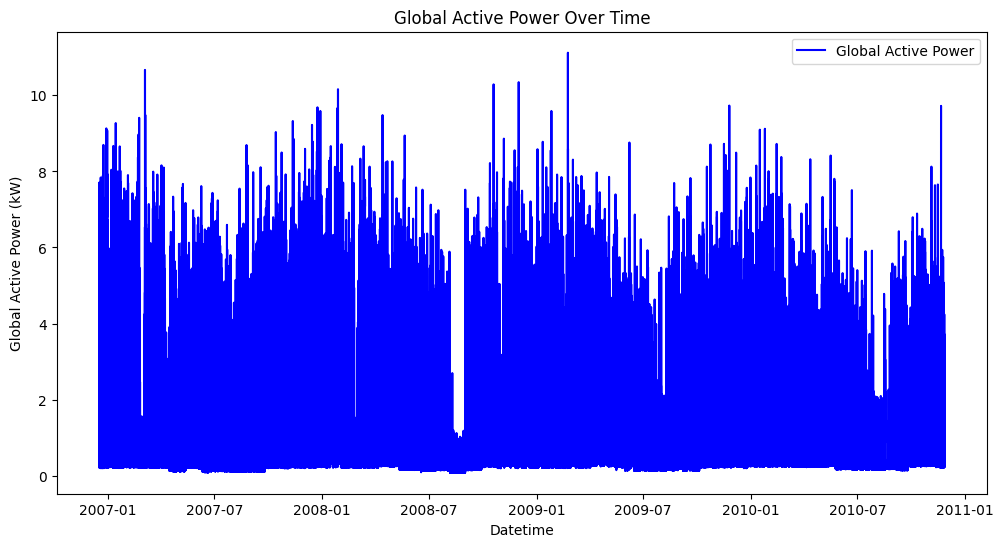

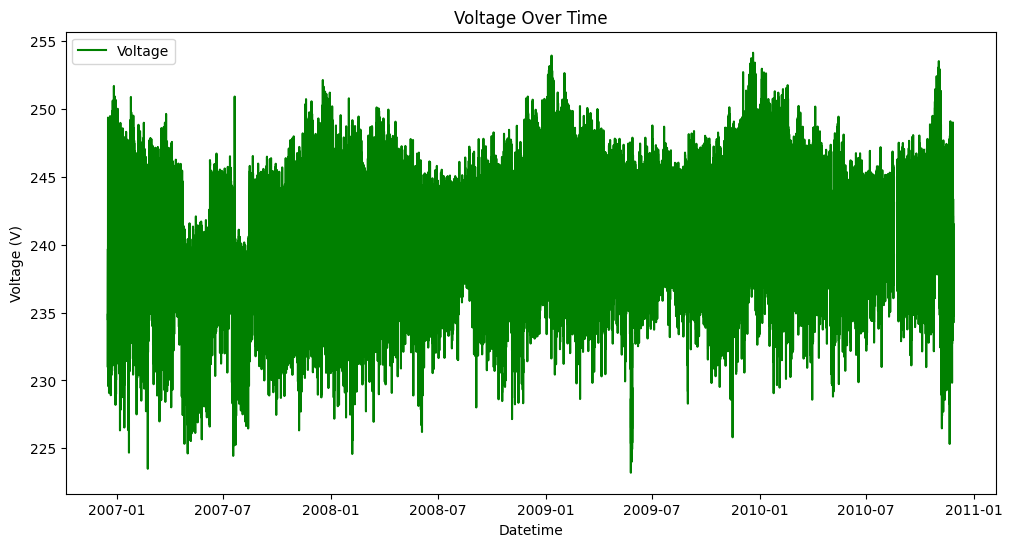

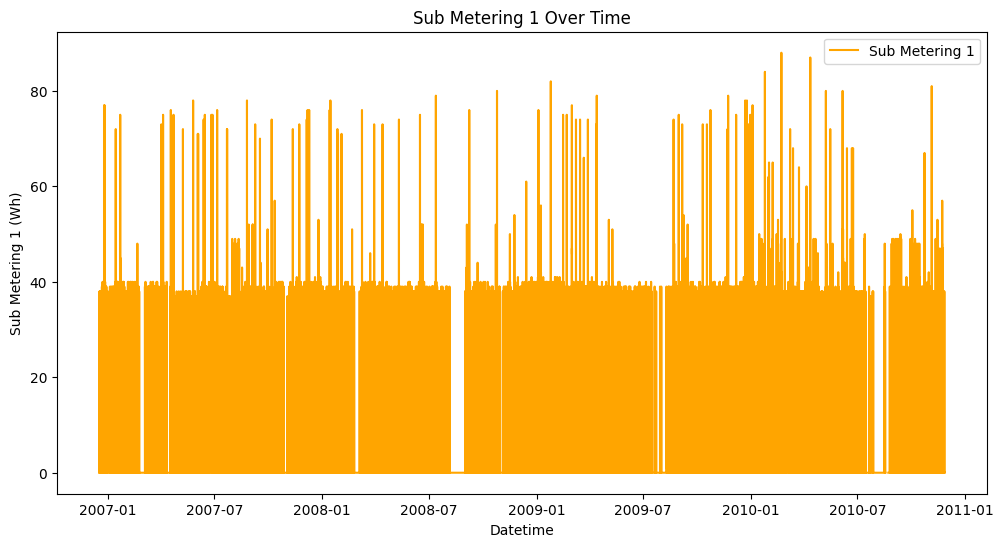

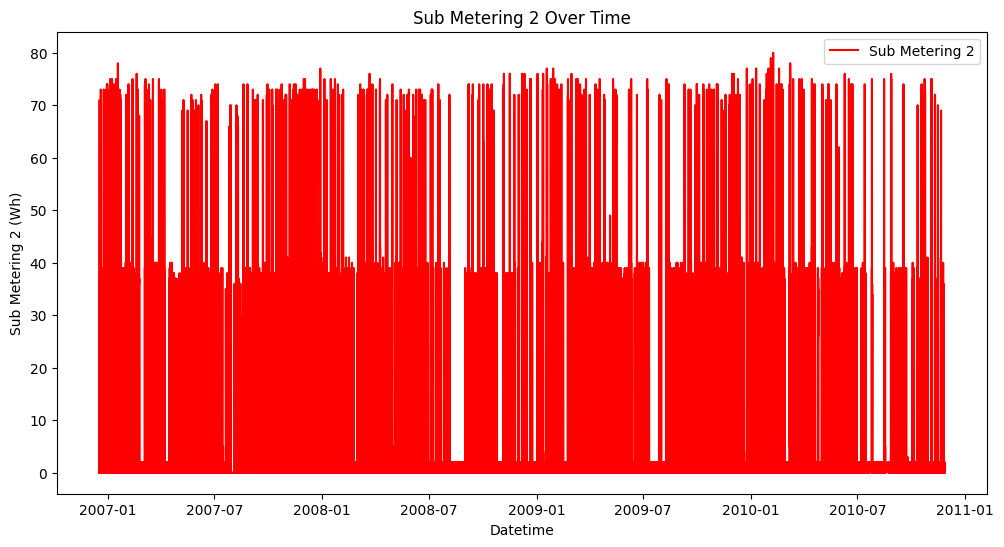

In [22]:
#build your line chart here
import matplotlib.pyplot as plt

# Plot Global_active_power over time
plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], df['Global_active_power'], color='blue', label='Global Active Power')
plt.title('Global Active Power Over Time')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

# Plot Voltage over time
plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], df['Voltage'], color='green', label='Voltage')
plt.title('Voltage Over Time')
plt.xlabel('Datetime')
plt.ylabel('Voltage (V)')
plt.legend()
plt.show()

# Plot Sub_metering_1 over time
plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], df['Sub_metering_1'], color='orange', label='Sub Metering 1')
plt.title('Sub Metering 1 Over Time')
plt.xlabel('Datetime')
plt.ylabel('Sub Metering 1 (Wh)')
plt.legend()
plt.show()

# Plot Sub_metering_2 over time
plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], df['Sub_metering_2'], color='red', label='Sub Metering 2')
plt.title('Sub Metering 2 Over Time')
plt.xlabel('Datetime')
plt.ylabel('Sub Metering 2 (Wh)')
plt.legend()
plt.show()

**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A:
1. **Observations:**
   - The visualizations reveal overall trends and fluctuations in the data, but the sheer density of the time series makes it hard to discern finer details.
   - Certain patterns, such as recurring peaks or periods of inactivity (e.g., in Global_active_power), are visible.
   - For Sub_metering_1 and Sub_metering_2, spikes and gaps suggest irregularities in energy consumption or possibly missing data previously filled.

2. **Usefulness:**
   - While these raw visualizations are useful for identifying high-level trends, they are not very effective for detailed analysis due to the high density of data points.
   - Zooming into specific time windows or aggregating data (e.g., daily or monthly averages) would make the visualizations more interpretable and actionable.

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).**

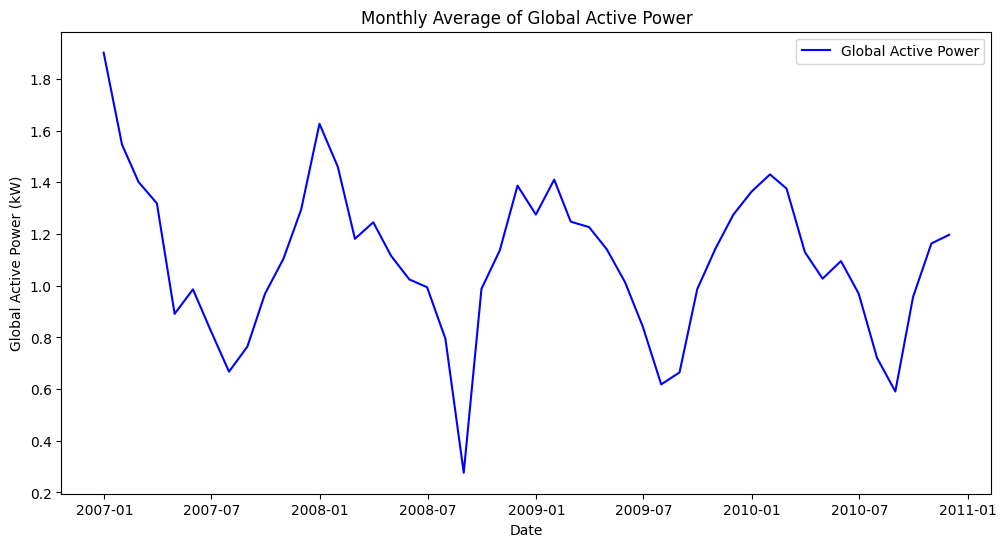

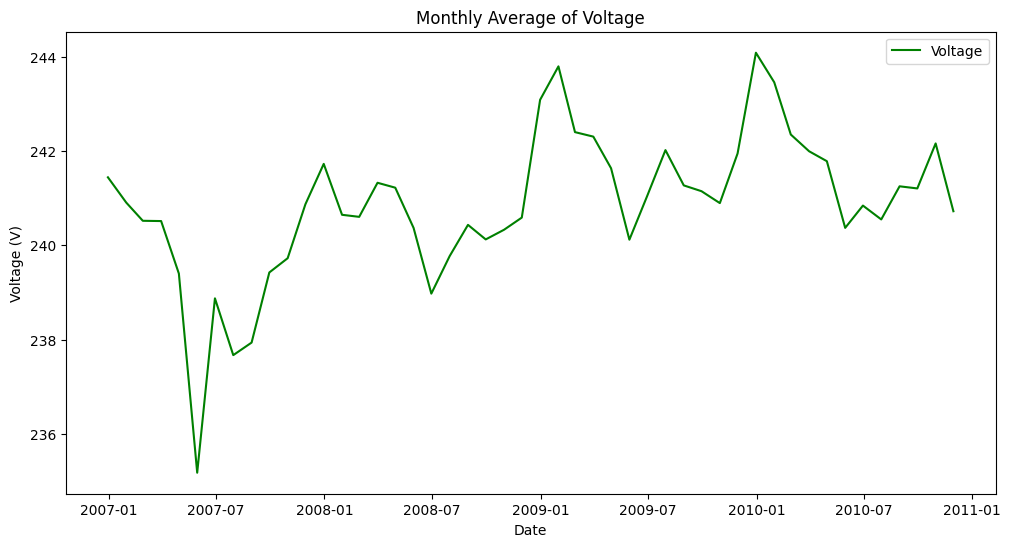

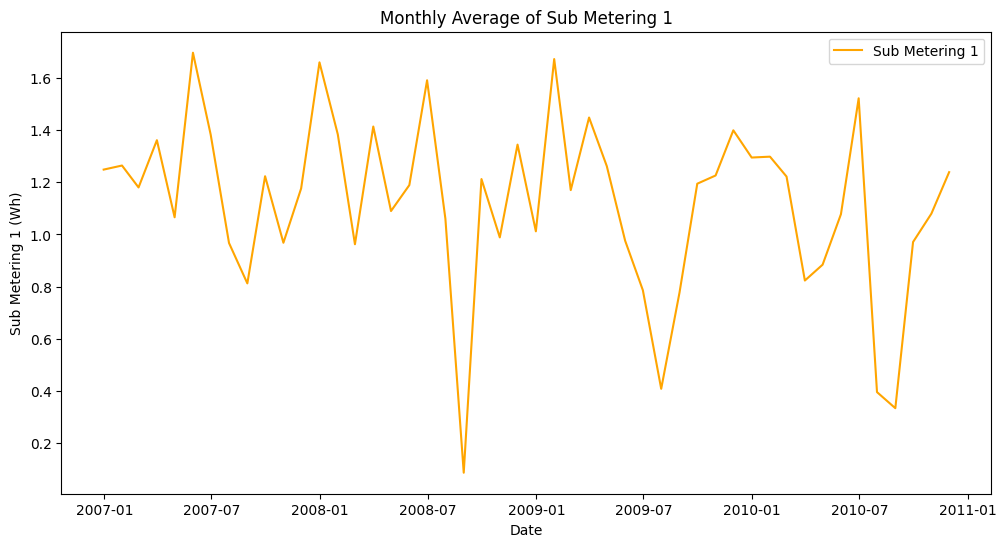

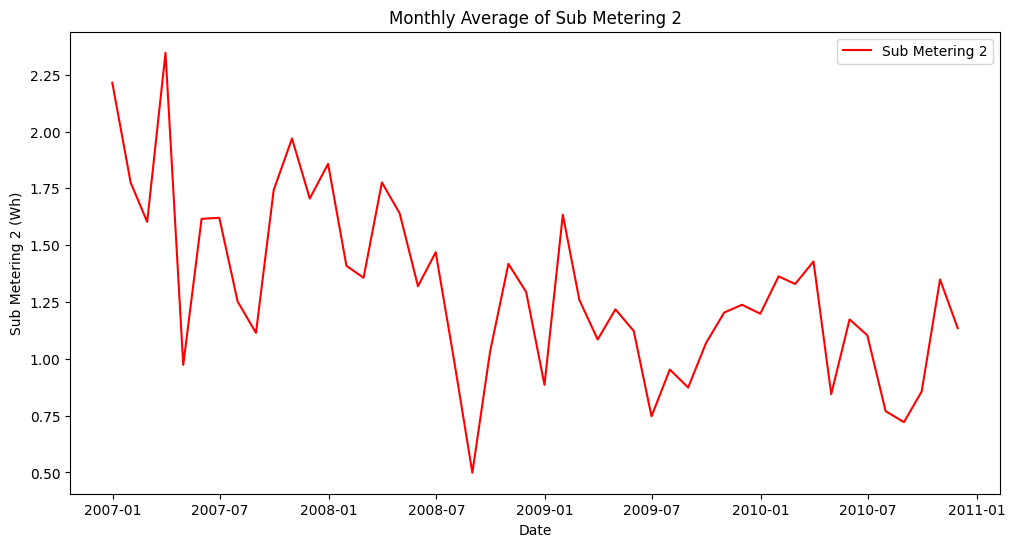

In [26]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper
# Compute monthly averages using pd.Grouper
# Ensure Datetime is included for grouping
numeric_df = df[['Datetime'] + list(df.select_dtypes(include=['float64', 'int64']).columns)]

# Compute monthly averages using pd.Grouper
monthly_avg = numeric_df.groupby(pd.Grouper(key='Datetime', freq='ME')).mean()

# Plot the monthly averages
# Plot Global_active_power over months
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg['Global_active_power'], color='blue', label='Global Active Power')
plt.title('Monthly Average of Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

# Plot Voltage over months
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg['Voltage'], color='green', label='Voltage')
plt.title('Monthly Average of Voltage')
plt.xlabel('Date')
plt.ylabel('Voltage (V)')
plt.legend()
plt.show()

# Plot Sub_metering_1 over months
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg['Sub_metering_1'], color='orange', label='Sub Metering 1')
plt.title('Monthly Average of Sub Metering 1')
plt.xlabel('Date')
plt.ylabel('Sub Metering 1 (Wh)')
plt.legend()
plt.show()

# Plot Sub_metering_2 over months
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg['Sub_metering_2'], color='red', label='Sub Metering 2')
plt.title('Monthly Average of Sub Metering 2')
plt.xlabel('Date')
plt.ylabel('Sub Metering 2 (Wh)')
plt.legend()
plt.show()

**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A:  
1. **Patterns Observed:**  
   - **Global Active Power** shows clear seasonal variations with peaks and troughs across years. These likely correspond to periods of high and low electricity demand, such as winter heating or summer cooling.
   - **Voltage** remains relatively stable but exhibits periodic dips and peaks that may correlate with grid demand or supply changes.
   - **Sub Metering 1 and 2** exhibit significant variability, with some months showing sharp decreases or spikes, potentially due to changes in appliance usage or occupancy.

2. **Relationships Between Variables:**  
   - **Global Active Power and Sub Metering 1/2**: There appears to be some alignment, where increases in Sub Metering usage correlate with higher Global Active Power. This makes sense as sub-metered appliances are a part of overall power consumption.
   - **Voltage and Global Active Power**: Voltage does not seem to strongly correlate with Global Active Power, as fluctuations in Voltage appear independent of overall power usage.

The patterns suggest further investigation into seasonal effects and the impact of external factors (e.g., weather or grid conditions) on power usage trends.

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

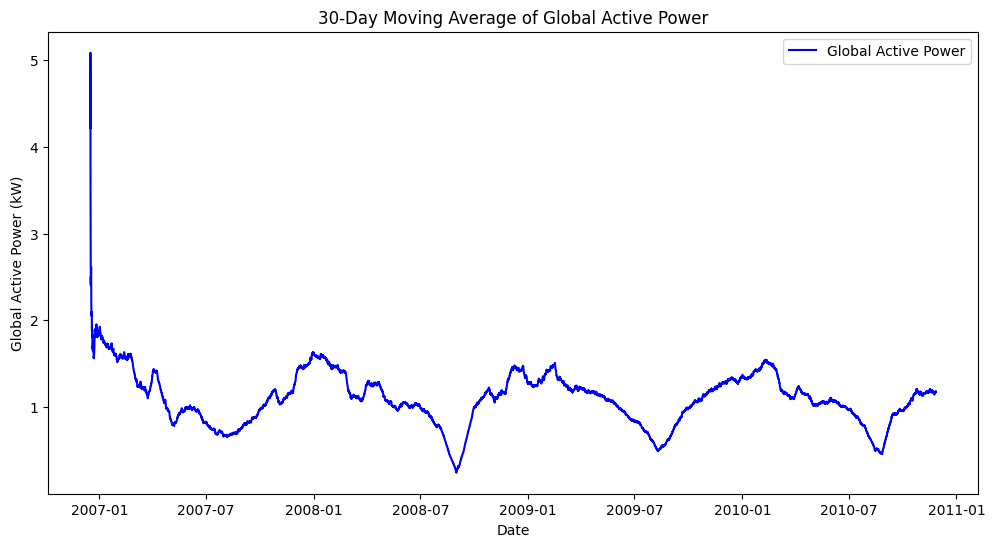

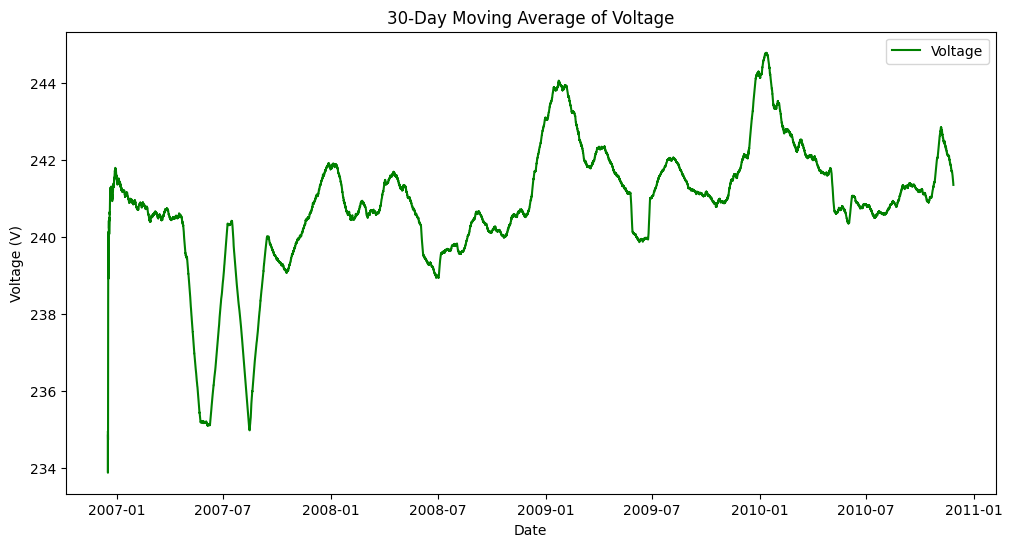

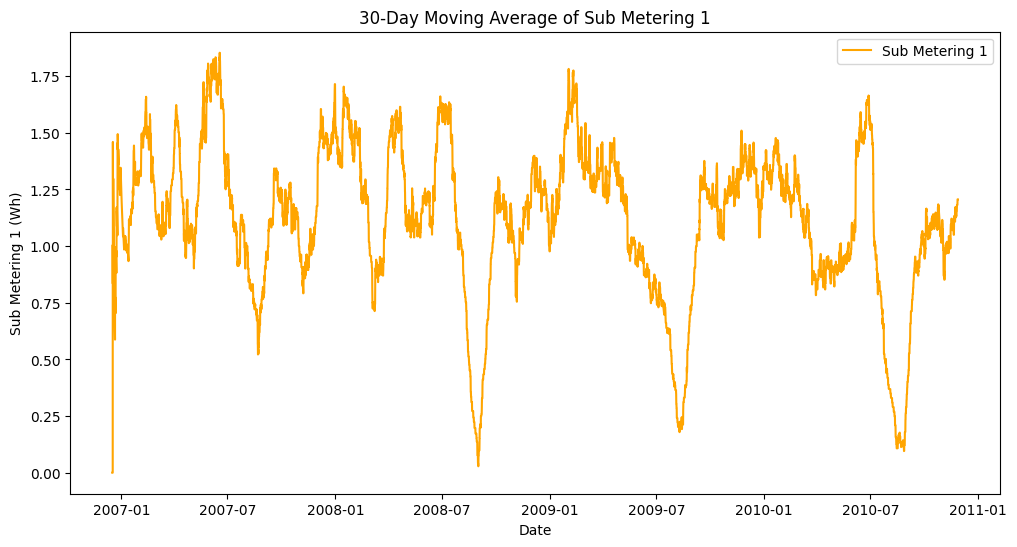

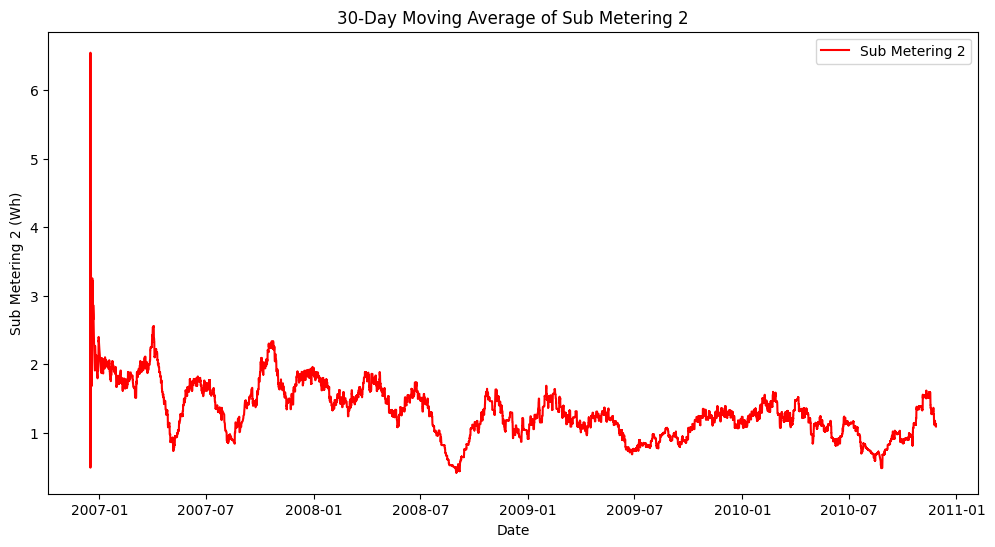

In [27]:
#compute your moving average here
# Compute a 30-day moving average (rolling window)
rolling_avg = df[['Datetime', 'Global_active_power', 'Voltage', 'Sub_metering_1', 'Sub_metering_2']].copy()
rolling_window = 30 * 24 * 60  # 30 days in minutes
rolling_avg[['Global_active_power', 'Voltage', 'Sub_metering_1', 'Sub_metering_2']] = rolling_avg[
    ['Global_active_power', 'Voltage', 'Sub_metering_1', 'Sub_metering_2']
].rolling(window=rolling_window, min_periods=1).mean()

# Plot the 30-day moving averages
# Plot Global_active_power moving average
plt.figure(figsize=(12, 6))
plt.plot(rolling_avg['Datetime'], rolling_avg['Global_active_power'], color='blue', label='Global Active Power')
plt.title('30-Day Moving Average of Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

# Plot Voltage moving average
plt.figure(figsize=(12, 6))
plt.plot(rolling_avg['Datetime'], rolling_avg['Voltage'], color='green', label='Voltage')
plt.title('30-Day Moving Average of Voltage')
plt.xlabel('Date')
plt.ylabel('Voltage (V)')
plt.legend()
plt.show()

# Plot Sub_metering_1 moving average
plt.figure(figsize=(12, 6))
plt.plot(rolling_avg['Datetime'], rolling_avg['Sub_metering_1'], color='orange', label='Sub Metering 1')
plt.title('30-Day Moving Average of Sub Metering 1')
plt.xlabel('Date')
plt.ylabel('Sub Metering 1 (Wh)')
plt.legend()
plt.show()

# Plot Sub_metering_2 moving average
plt.figure(figsize=(12, 6))
plt.plot(rolling_avg['Datetime'], rolling_avg['Sub_metering_2'], color='red', label='Sub Metering 2')
plt.title('30-Day Moving Average of Sub Metering 2')
plt.xlabel('Date')
plt.ylabel('Sub Metering 2 (Wh)')
plt.legend()
plt.show()

**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A:
1. **Comparison:**
   - The **monthly average** provides a cleaner, simplified overview by aggregating data into discrete points for each month. This is helpful for identifying long-term trends and seasonal patterns.
   - The **30-day moving average** smooths the data while retaining more granularity and reflecting shorter-term variations in the dataset. It highlights local trends and gradual changes over time without the abrupt transitions seen in monthly averages.

2. **Effectiveness:**
   - The **monthly average** is more effective for high-level trend analysis because it is easier to interpret and compare periods, especially when working with long-term data.
   - The **30-day moving average** is more effective for detecting finer, rolling trends, especially when there is significant day-to-day variability.

3. **Recommendation:**
   - Use **monthly averages** for broad, high-level insights and seasonal trends.
   - Use **moving averages** for more detailed analysis and identifying short-term patterns or anomalies.


## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

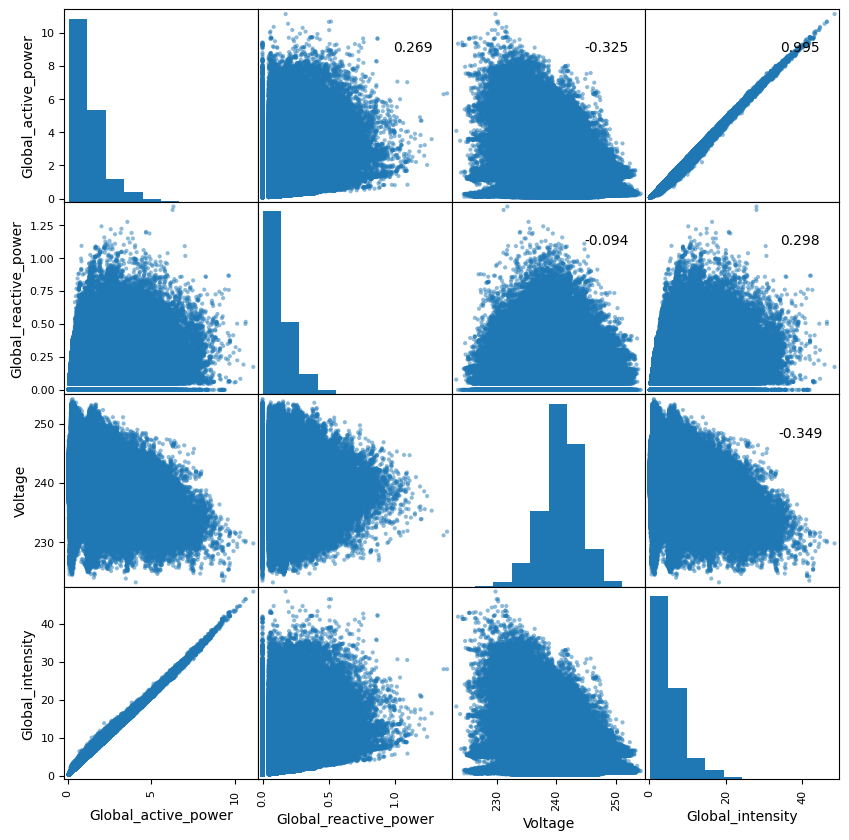

In [28]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A:   

1. **Patterns and Correlations:**  
   - **Global Active Power and Global Intensity (0.985):** The strong positive correlation indicates that as the current drawn by appliances increases, the active power consumption also rises. This relationship is crucial as both variables essentially capture related aspects of energy usage.
   - **Global Reactive Power and Global Active Power (0.269):** A moderate positive correlation suggests that some of the reactive power may be a byproduct of active power consumption, though they aren't directly proportional.
   - **Voltage and Global Intensity (-0.349):** The negative correlation implies that higher power consumption (through increased current) causes voltage drops, a typical behavior of power distribution networks under heavy load.
   - **Voltage and Global Active Power (-0.325):** This inverse relationship mirrors the effect of load on the grid's voltage stability.
   - **Global Reactive Power and Voltage (-0.094):** The weak correlation suggests little dependence of reactive power on voltage changes.

2. **Impact on Downstream Tasks:**
   - **Feature Selection:** Variables with high correlations (e.g., Global Active Power and Global Intensity) may provide redundant information, and one could potentially be excluded to avoid multicollinearity in predictive models.
   - **Data Transformation:** The relationships between variables like voltage and active power could benefit from non-linear modeling techniques if simple linear correlations don't fully capture their interaction.
   - **Predictive Modeling:** Understanding the relationships between variables helps in feature engineering and improves the interpretability of downstream machine learning tasks, such as predicting power demand or detecting anomalies.
   - **Dimensionality Reduction:** Correlated variables can be combined or transformed (e.g., via PCA) to reduce dimensionality and improve model efficiency.